In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from numpy import random
import matplotlib.pyplot as plt
from keras import Sequential, Model
from keras.backend import tensorflow_backend as K
from keras.layers import LSTM, Dense, Conv1D, Input, concatenate, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

In [2]:
trainX = np.load('/Users/cgroschner/Desktop/trainX_full_noTemp.npy')
trainY = np.load('/Users/cgroschner/Desktop/trainY_full_noTemp.npy')

In [20]:
save_weights = '/Users/cgroschner/Desktop/lstm1.h5'


earlyStopping = EarlyStopping(monitor='loss',
                              patience=2,
                              verbose=2,
                              min_delta = 1,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

In [7]:
model = Sequential()
model.add(LSTM(256, input_shape=(2160,51)))
model.add(Dense(6600))
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2,callbacks=callbacks_list)

Epoch 1/5
 - 424s - loss: 62729.2524
Epoch 2/5


/Users/cgroschner/Documents/gdso_2019/Kate/venv/lib/python3.6/site-packages/keras/callbacks.py:435: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/Users/cgroschner/Documents/gdso_2019/Kate/venv/lib/python3.6/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 424s - loss: 60490.6906
Epoch 3/5
 - 421s - loss: 58642.7992
Epoch 4/5
 - 422s - loss: 57225.5598
Epoch 5/5
 - 420s - loss: 56010.0538


In [23]:
model.save('/Users/cgroschner/Desktop/lstm0.h5')

In [3]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(2160,42)))
model2.add(Dense(6600))
model2.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
save_weights = '/Users/cgroschner/Desktop/lstm2.h5'

In [22]:
model2.fit(trainX[:,:,1:43], trainY, epochs=5, batch_size=1, verbose=2,callbacks=callbacks_list)

Epoch 1/5
 - 421s - loss: 58635.3486

Epoch 00001: loss improved from inf to 58635.34862, saving model to /Users/cgroschner/Desktop/lstm1.h5
Epoch 2/5
 - 423s - loss: 53217.4606

Epoch 00002: loss improved from 58635.34862 to 53217.46059, saving model to /Users/cgroschner/Desktop/lstm1.h5
Epoch 3/5
 - 445s - loss: 50879.9280

Epoch 00003: loss improved from 53217.46059 to 50879.92801, saving model to /Users/cgroschner/Desktop/lstm1.h5
Epoch 4/5
 - 421s - loss: 49815.0222

Epoch 00004: loss improved from 50879.92801 to 49815.02217, saving model to /Users/cgroschner/Desktop/lstm1.h5
Epoch 5/5
 - 420s - loss: 49333.8017

Epoch 00005: loss improved from 49815.02217 to 49333.80167, saving model to /Users/cgroschner/Desktop/lstm1.h5


In [5]:
pred = model2.predict(trainX[0:1,:,1:43])

In [4]:
model2.load_weights('/Users/cgroschner/Desktop/lstm1.h5')

In [7]:
trainY[0:1].shape

(1, 6600)

In [8]:
pred.shape

(1, 6600)

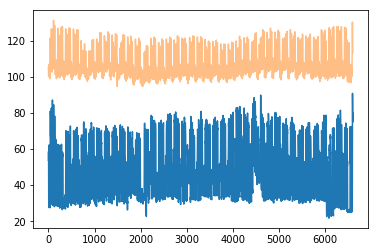

In [9]:
plt.plot(trainY[0:1].flatten())
plt.plot(pred.flatten(),alpha=0.5)

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_trainY = scaler.fit_transform(trainY)

In [14]:
save_weights = '/Users/cgroschner/Desktop/lstm3.h5'


earlyStopping = EarlyStopping(monitor='loss',
                              patience=2,
                              verbose=2,
                              min_delta = 1,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

In [15]:
model3 = Sequential()
model3.add(LSTM(256, input_shape=(2160,42)))
model3.add(Dense(6600))
model3.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model3.fit(trainX[:,:,1:43], scaled_trainY, epochs=5, batch_size=1, verbose=2,callbacks=callbacks_list)

Epoch 1/5
 - 431s - loss: 0.0073

Epoch 00001: loss improved from inf to 0.00726, saving model to /Users/cgroschner/Desktop/lstm3.h5
Epoch 2/5
 - 430s - loss: 0.0071

Epoch 00002: loss improved from 0.00726 to 0.00710, saving model to /Users/cgroschner/Desktop/lstm3.h5
Epoch 3/5
 - 429s - loss: 0.0070

Epoch 00003: loss improved from 0.00710 to 0.00697, saving model to /Users/cgroschner/Desktop/lstm3.h5
Epoch 00003: early stopping


In [17]:
pred3 = model3.predict(trainX[0:1,:,1:43])

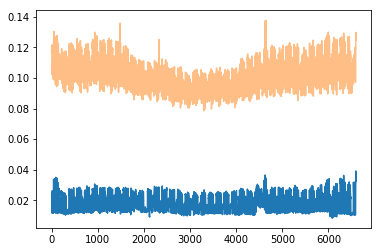

In [18]:
plt.plot(scaled_trainY[0:1].flatten())
plt.plot(pred3.flatten(),alpha=0.5)

In [23]:
trainXNorm = trainX.copy()

In [28]:
trainXNorm[:,:,0] = trainX[:,:,0]/trainX[:,:,0].max()

In [25]:
trainXNorm.shape

(405, 2160, 51)

In [31]:
trainXNorm[0,0,0]

0.044267538718246686

In [32]:
save_weights = '/Users/cgroschner/Desktop/lstm4.h5'


earlyStopping = EarlyStopping(monitor='loss',
                              patience=2,
                              verbose=2,
                              min_delta = 0.00001,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

In [33]:
model4 = Sequential()
model4.add(LSTM(256, input_shape=(2160,43)))
model4.add(Dense(6600))
model4.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model4.fit(trainXNorm[:,:,:43], scaled_trainY, epochs=5, batch_size=1, verbose=2,callbacks=callbacks_list)

Epoch 1/5
 - 430s - loss: 0.0073

Epoch 00001: loss improved from inf to 0.00728, saving model to /Users/cgroschner/Desktop/lstm4.h5
Epoch 2/5
 - 430s - loss: 0.0069

Epoch 00002: loss improved from 0.00728 to 0.00687, saving model to /Users/cgroschner/Desktop/lstm4.h5
Epoch 3/5
 - 430s - loss: 0.0064

Epoch 00003: loss improved from 0.00687 to 0.00644, saving model to /Users/cgroschner/Desktop/lstm4.h5
Epoch 4/5
 - 427s - loss: 0.0092

Epoch 00004: loss did not improve from 0.00644
Epoch 5/5
 - 426s - loss: 0.0059

Epoch 00005: loss improved from 0.00644 to 0.00586, saving model to /Users/cgroschner/Desktop/lstm4.h5


In [35]:
pred4 = model4.predict(trainXNorm[:,:,:43])

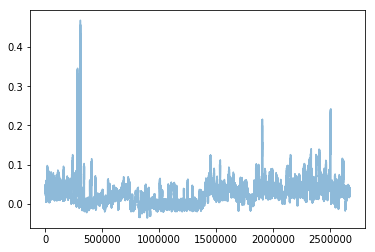

In [45]:
plt.plot(pred4.flatten(),alpha=0.5)
# plt.plot(scaled_trainY[0:1].flatten())


In [47]:
ytrue1 = scaler.inverse_transform(scaled_trainY[0:1])

In [50]:
ypred1 = scaler.inverse_transform(pred4)

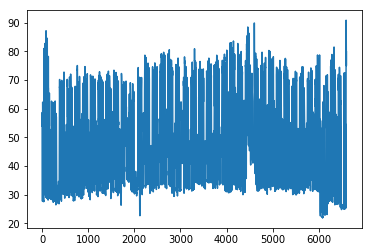

In [52]:
plt.plot(ytrue1.flatten())


(0, 90)

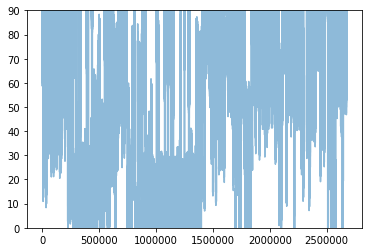

In [54]:
plt.plot(ypred1.flatten(),alpha=0.5)
plt.ylim([0,90])

In [55]:
pdX = pd.read_csv('/Users/cgroschner/Desktop/pdTrainX.csv',parse_dates=['timestamp'])
pdY = pd.read_csv('/Users/cgroschner/Desktop/pdTrainY.csv',parse_dates=['timestamp'])

In [56]:
trainX2 = pdX.copy()

In [57]:
pdX.columns

Index(['Unnamed: 0', 'timestamp', 'electricity', 'building_name',
       'weather_file', 'industry', 'area', 'primary_space_usage', 'year',
       'month', 'hour', 'weekday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'primary_space_usage_Office',
       'primary_space_usage_PrimClass', 'primary_space_usage_UnivClass',
       'primary_space_usage_UnivDorm', 'primary_space_usage_UnivLab',
       'industry_Commercial Property', 'industry_Education',
       'industry_Government'],
      dtype='object')

In [59]:
trainX2 = trainX2.drop(columns=['year','Unnamed: 0','timestamp','weather_file','primary_space_usage','month', 'hour', 'weekday','industry'])

In [60]:
trainX2 = trainX2.drop(columns=['primary_space_usage_Office',
       'primary_space_usage_PrimClass', 'primary_space_usage_UnivClass',
       'primary_space_usage_UnivDorm', 'primary_space_usage_UnivLab',
       'industry_Commercial Property', 'industry_Education',
       'industry_Government'])

In [61]:
trainX2.shape

(874800, 46)

In [62]:
trainX2.head()

,electricity,building_name,area,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,hour_21,hour_22,hour_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,73.49,Office_Abbey,6891.54454,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,64.77,Office_Abbey,6891.54454,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,67.43,Office_Abbey,6891.54454,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,63.57,Office_Abbey,6891.54454,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,65.10,Office_Abbey,6891.54454,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
scaler2 = MinMaxScaler()

In [74]:
trainX2[['electricity']] = scaler2.fit_transform(trainX2[['electricity']])

In [122]:
def reshape_input(df,scaler,drop_col):
    max_area = df['area'].max()
    X = []
    df[['electricity']] = scaler.fit_transform(df[['electricity']])
    df = df.drop(columns=drop_col)
    for bldg in df['building_name'].drop_duplicates():
        X_n = []
        subset = df[df['building_name']==bldg]
        subset['area'] = subset['area']/max_area
        subset = subset.drop(columns=['building_name'])
        for row in subset.iterrows():
            row = np.array(row[-1])
            X_n.append(row)
        X.append(X_n)
    X = np.array(X)
    return X

In [81]:
trainX2np = reshape_input(trainX2)

/Users/cgroschner/Documents/gdso_2019/Kate/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [82]:
trainX2np.shape

(405, 2160, 46)

In [88]:
elec = trainX2np[:,:,0:1]

In [91]:
trainX2in = np.zeros((trainX2np.shape[0],trainX2np.shape[1],trainX2np.shape[2]-1))

In [92]:
trainX2in[:,:,0:1] = elec

In [93]:
trainX2in[:,:,1:] = trainX2np[:,:,2:]

In [94]:
trainX2in.shape

(405, 2160, 45)

In [99]:
def reshape_output(df,scaler):
    Y = []
    df[['electricity']] = scaler.transform(df[['electricity']])
    for bldg in df['building_name'].drop_duplicates():
        Y_n = []
        subset = df[df['building_name']==bldg]
        subset = subset[['electricity']]
        for row in subset.iterrows():
            row = np.array(row[-1])
            Y_n.append(row)
        Y.append(Y_n)
    Y = np.array(Y)
    return Y

In [100]:
trainY2 = reshape_output(pdY,scaler2)

In [103]:
trainY2 = trainY2.reshape((405,6600))

In [105]:
save_weights = '/Users/cgroschner/Desktop/lstm5.h5'


earlyStopping = EarlyStopping(monitor='loss',
                              patience=2,
                              verbose=2,
                              min_delta = 0.00001,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

model5 = Sequential()
model5.add(LSTM(256, input_shape=(2160,1)))
model5.add(Dense(6600))
model5.compile(loss='mean_squared_error', optimizer='adam')

In [111]:
trainY2.shape

(405, 6600)

In [106]:
model5.fit(trainX2in[:,:,0:1], trainY2, epochs=5, batch_size=1, verbose=2,callbacks=callbacks_list)

Epoch 1/5
 - 437s - loss: 3.3159e-07

Epoch 00001: loss improved from inf to 0.00000, saving model to /Users/cgroschner/Desktop/lstm5.h5
Epoch 2/5
 - 440s - loss: 5.7113e-08

Epoch 00002: loss improved from 0.00000 to 0.00000, saving model to /Users/cgroschner/Desktop/lstm5.h5
Epoch 3/5
 - 436s - loss: 2.3063e-08

Epoch 00003: loss improved from 0.00000 to 0.00000, saving model to /Users/cgroschner/Desktop/lstm5.h5
Epoch 00003: early stopping


In [145]:
trainX2in.shape

(405, 2160, 45)

In [109]:
pred5 = model5.predict(trainX2in[0:1,:,0:1])

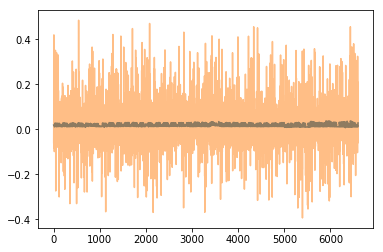

In [120]:
plt.plot(scaler2.inverse_transform(trainY2[0:1]).flatten())
plt.plot(scaler2.inverse_transform(pred5).flatten(),alpha = 0.5)

In [121]:
pdTestX = pd.read_csv('/Users/cgroschner/Desktop/pdTestX.csv')

In [141]:
pdTestY = pd.read_csv('/Users/cgroschner/Downloads/pdTestY.csv')

In [137]:
pdTestX.shape

(220320, 63)

In [142]:
pdTestY.shape[0]/6600

102.0

In [124]:
drop_col = ['primary_space_usage_Office',
       'primary_space_usage_PrimClass', 'primary_space_usage_UnivClass',
       'primary_space_usage_UnivDorm', 'primary_space_usage_UnivLab',
       'industry_Commercial Property', 'industry_Education',
       'industry_Government','year','Unnamed: 0','timestamp','weather_file','primary_space_usage','month', 'hour', 'weekday','industry']

In [ ]:
testX

In [125]:
testX2 = reshape_input(pdTestX,scaler2,drop_col)

/Users/cgroschner/Documents/gdso_2019/Kate/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [143]:
testY2 = reshape_output(pdTestY.copy(),scaler2)

In [144]:
testY2.shape

(102, 6600, 1)

In [ ]:
def reshape_output(df,scaler):
    Y = []
    df[['electricity']] = scaler.transform(df[['electricity']])
    for bldg in df['building_name'].drop_duplicates():
        Y_n = []
        subset = df[df['building_name']==bldg]
        subset = subset[['electricity']]
        for row in subset.iterrows():
            row = np.array(row[-1])
            Y_n.append(row)
        Y.append(Y_n)
    Y = np.array(Y)
    return Y

In [132]:
testY2.shape

(39,)

In [126]:
testX2.shape

(102, 2160, 45)

In [127]:
trainX2in.shape

(405, 2160, 45)

In [129]:
pre5b = model5.predict(testX2[0:1,:,0:1])

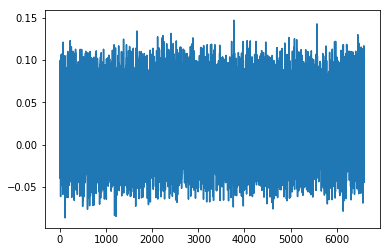

In [134]:
# plt.plot(testY2[0:1].flatten())
plt.plot(scaler2.inverse_transform(pre5b).flatten())

In [ ]:
save_weights = '/Users/cgroschner/Desktop/lstm6.h5'


earlyStopping = EarlyStopping(monitor='loss',
                              patience=2,
                              verbose=2,
                              min_delta = 0.00001,
                              mode='min',)

modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'loss',
                                  save_best_only = True,
                                  mode = 'min',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint,earlyStopping]

model6 = Sequential()
model6.add(LSTM(256, input_shape=(2160,1)))
model6.add(Dense(6600))
model6.compile(loss='mean_squared_error', optimizer='adam')

In [117]:
# define two sets of inputs
inputA = Input(shape=(2160,43))
inputB = Input(shape=(2160,1))

# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# the second branch opreates on the second input
y = LSTM(128, activation="relu")(inputB)
y = Dense(6600, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(6600, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model6 = Model(inputs=[x.input, y.input], outputs=z)

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 2160, 4), (None, 4)]

In [ ]:
model6.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model6.fit([trainX2in[:,:,1:2],trainX2in[:,:,0:1]], trainY2, epochs=5, batch_size=1, verbose=2)

In [146]:
pdX[pdX['building_name']=='Office_Abigail']

,Unnamed: 0,timestamp,electricity,building_name,weather_file,industry,area,primary_space_usage,year,month,...,weekday_5,weekday_6,primary_space_usage_Office,primary_space_usage_PrimClass,primary_space_usage_UnivClass,primary_space_usage_UnivDorm,primary_space_usage_UnivLab,industry_Commercial Property,industry_Education,industry_Government
2160,8973,2015-01-10 04:00:00,6.23,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2161,8974,2015-01-10 05:00:00,5.52,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2162,8975,2015-01-10 06:00:00,5.97,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2163,8976,2015-01-10 07:00:00,6.36,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2164,8977,2015-01-10 08:00:00,6.52,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2165,8978,2015-01-10 09:00:00,7.18,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2166,8979,2015-01-10 10:00:00,6.37,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2167,8980,2015-01-10 11:00:00,6.66,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2168,8981,2015-01-10 12:00:00,5.86,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
2169,8982,2015-01-10 13:00:00,6.65,Office_Abigail,weather0.csv,Education,901.437809,Office,2015,1,...,1,0,1,0,0,0,0,0,1,0
